<a href="https://colab.research.google.com/github/jagadish9084/learnbay-ds-ml-course/blob/main/ml_models/supervised/knn/diabetes_prediction_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objectives

The objective of models built on this dataset is to predict the binary Outcome (whether a patient has diabetes or not) based on the provided medical features. It's widely used for training classification models like K-Nearest Neighbors (KNN), Logistic Regression, and other machine learning algorithms

# Data dictionary

The dataset contains medical information about patients, including:

1. Pregnancies: The number of times the patient has been pregnant.
2. Glucose: Plasma glucose concentration after a 2-hour oral glucose tolerance test.
3. BloodPressure: Diastolic blood pressure (mm Hg).
4. SkinThickness: Thickness of the triceps skin fold (mm), which can indicate fat distribution.
5. Insulin: 2-hour serum insulin level (mu U/mL).
6. BMI: Body Mass Index (weight in kg divided by height in m²), indicating body fat.
7. DiabetesPedigreeFunction: A score based on family history and genetics indicating the likelihood of diabetes.
8. Age: The age of the patient in years.
9. Outcome: The target variable indicating if the person has diabetes:
- 0: Non-diabetic
- 1: Diabetic

# Data cleaning and feature Engineering

In [482]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [483]:
# Load data
data = pd.read_csv("/content/sample_data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [484]:
data['Outcome'].unique()

array([1, 0])

In [485]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


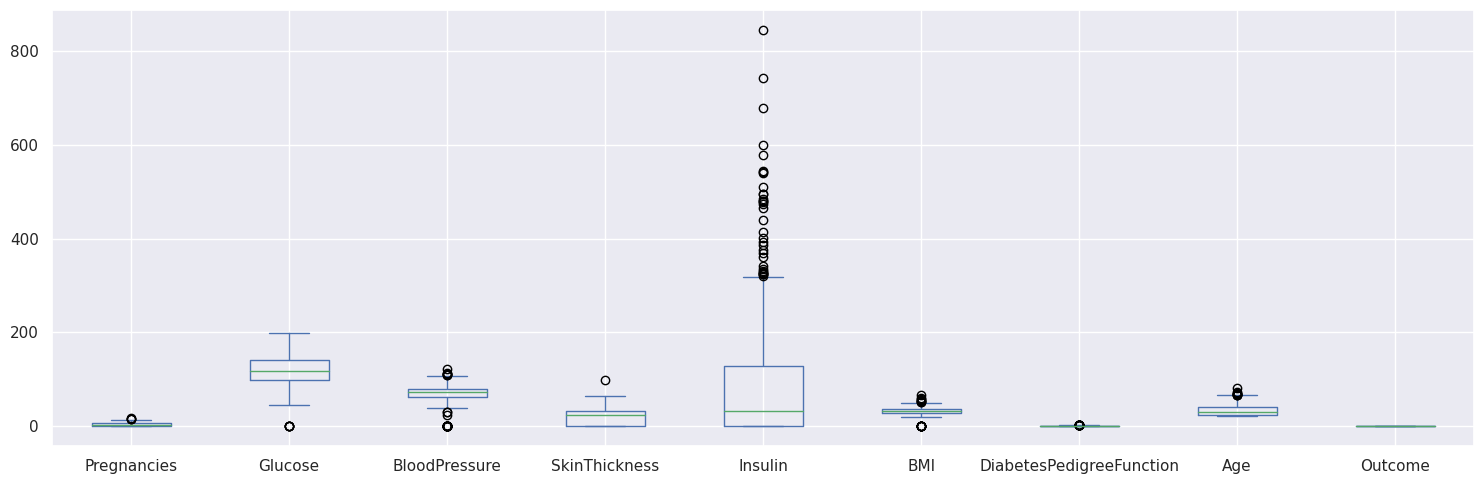

In [486]:
# Check outlier
sns.set()
data.plot(kind='box', figsize=(15, 5))
plt.tight_layout()
plt.show()

In [487]:
# Handler outlier
for col in data.columns:
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1
  lower_fence = q1 - 1.5*iqr
  upper_fence = q3 + 1.5*iqr
  data[col].clip(lower_fence, upper_fence, inplace=True)

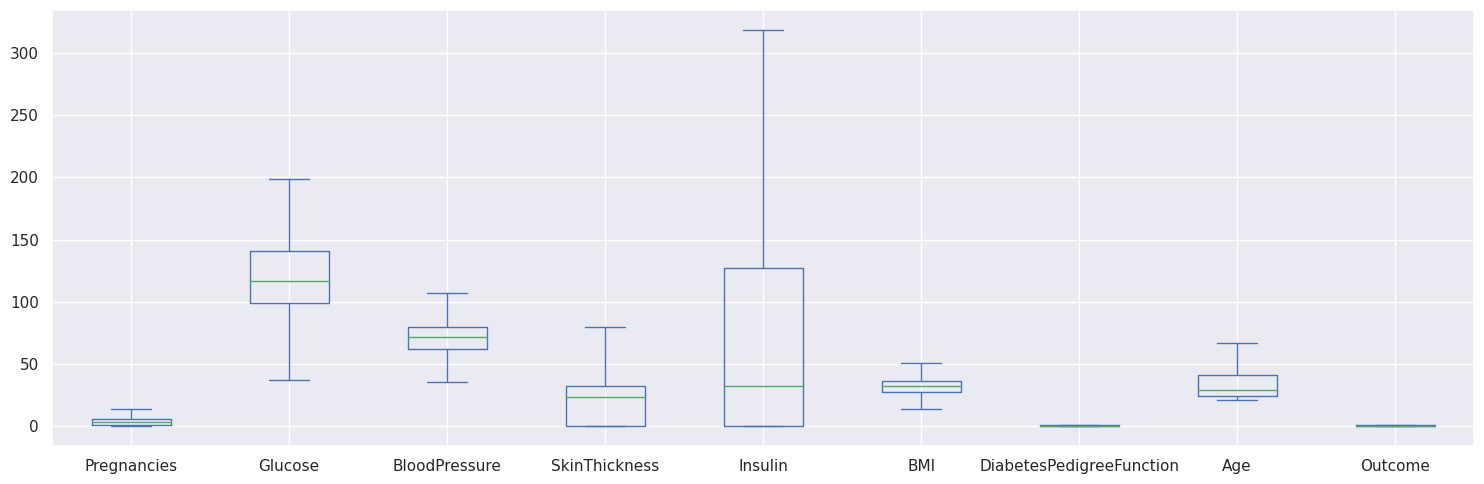

In [488]:
# Check outlier after outlier treatment
data.plot(kind='box', figsize=(15, 5))
plt.tight_layout()
plt.show()

[Text(0, 0, '499'), Text(0, 0, '268')]

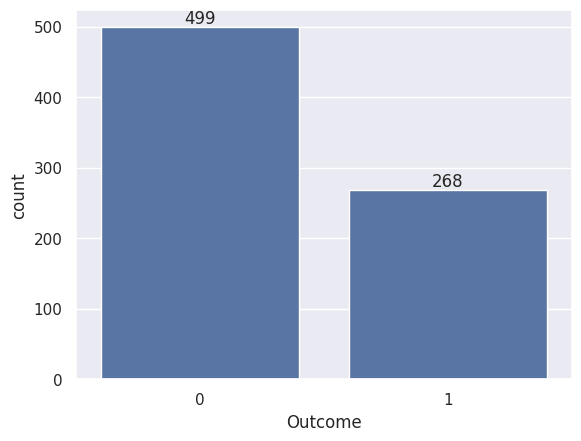

In [489]:
# target class distribution
ax = sns.countplot(data, x='Outcome')
plt.bar_label(ax.containers[0])

In [490]:
# Split feature and target variable
X = data.drop(['Outcome'], axis=1)
y = data[['Outcome']]
print(f"Dimention of the features: {X.shape}")
print(f"Dimention of the target: {y.shape}")

Dimention of the features: (767, 8)
Dimention of the target: (767, 1)


In [491]:
#  Split the data into traing and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)
print(f"Dimention of the X_train: {X_train.shape}")
print(f"Dimention of the X_test: {X_test.shape}")
print(f"Dimention of the y_train: {y_train.shape}")
print(f"Dimention of the y_test: {y_test.shape}")

Dimention of the X_train: (536, 8)
Dimention of the X_test: (231, 8)
Dimention of the y_train: (536, 1)
Dimention of the y_test: (231, 1)


# K Nearest Neihbor(KNN)

In [492]:
# Build Model
knn = KNeighborsClassifier()
scalar = StandardScaler()
knn_pipeline = Pipeline([('scalar', scalar), ('knn', KNeighborsClassifier())])
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('knn', KNeighborsClassifier())])

Training Accuracy: 81.53
Training Precision: 80.56
Training Recall: 62.03


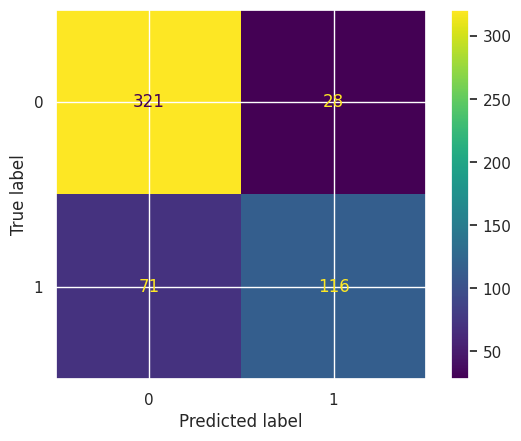

In [493]:
# Evaluate the training performance
y_pred = knn_pipeline.predict(X_train)
print(f"Training Accuracy: {round(accuracy_score(y_train, y_pred)*100, 2)}")
print(f"Training Precision: {round(precision_score(y_train, y_pred)*100, 2)}")
print(f"Training Recall: {round(recall_score(y_train, y_pred)*100, 2)}")

#Confusion metrix
cm = ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

Testing Accuracy: 73.16
Testing Precision: 65.57
Testing Recall: 49.38


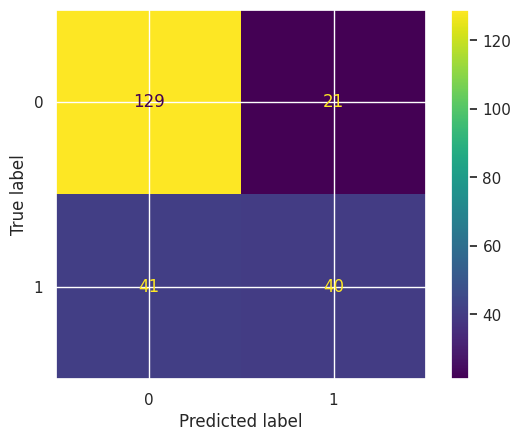

In [494]:
# Evaluate the testing performance
y_pred = knn_pipeline.predict(X_test)
print(f"Testing Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)}")
print(f"Testing Precision: {round(precision_score(y_test, y_pred)*100, 2)}")
print(f"Testing Recall: {round(recall_score(y_test, y_pred)*100, 2)}")

#Confusion metrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Training Performance:

1. Training accuracy: 81.53%, which means that the model correctly classified 81.53% of the data in training set.

2. Training Precision:80.56%, Precision measures how many of the positive predictions (e.g., predicting a person has diabetes) were actually correct. Which means that out of all of the positive prediction, 80.56% predictions are true postive.

3. Training Recall: 62.03%, Recall (also known as sensitivity) measures how many actual positive cases were correctly predicted. A recall of 62.03% means that the model correctly identified 62.03% of the true positive cases from the training data.

# Testing Performance:

1. Testing accuracy: 73.16%. The model correctly classified 73.16% of the samples in the testing dataset. This drop from training accuracy(81.53%) to testing accuracy(73.16%) indicate some level of overfitting.

2. Testing Precision:65.57%, Which means that out of all of the positive prediction, 65.57% predictions are true postive.

3. Testing Recall: 49.38%, A recall of49.38% means that the model correctly identified 49.38% of the true positive cases from the training data.

Conclusion:

1. Overfitting: The gap between training accuracy and testing accuracy suggest that the model might be overfitting the training data.
2. Low Racall on test data: The recall of 49.38% on test set is concerning, perticularly when this model is used in sesitive application like diabetics predictions, where missing true positive cases(people with diabetics) can have a serious consequences.

# Hyperparameter Tuning with Different K values

# Cross-Validation

In [495]:
# Hyper parameters
param = {"estimator__n_neighbors": range(1, 31),"estimator__weights": ['uniform', 'distance'],"estimator__p": [1, 2]}
estimator = KNeighborsClassifier()
scalar = StandardScaler()
gs_cv_pipeline = Pipeline([('scalar',scalar ), ('estimator', estimator)])

gs_cv = GridSearchCV(estimator=gs_cv_pipeline, param_grid=param, scoring='accuracy', cv=5)
gs_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('estimator', KNeighborsClassifier())]),
             param_grid={'estimator__n_neighbors': range(1, 31),
                         'estimator__p': [1, 2],
                         'estimator__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [496]:
print(f"best score: {gs_cv.best_score_}")
print(f"best params: {gs_cv.best_params_}")

best score: 0.7780027691242645
best params: {'estimator__n_neighbors': 27, 'estimator__p': 2, 'estimator__weights': 'uniform'}


In [497]:
y_pred = gs_cv.best_estimator_.predict(X_train)
print(f"Training Accuracy: {round(accuracy_score(y_train, y_pred)*100, 2)}")
print(f"Training Precision: {round(precision_score(y_train, y_pred)*100, 2)}")
print(f"Training Recall: {round(recall_score(y_train, y_pred)*100, 2)}")
print("\n")
y_pred = gs_cv.best_estimator_.predict(X_test)
print(f"Testing Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)}")
print(f"Testing Precision: {round(precision_score(y_test, y_pred)*100, 2)}")
print(f"Testing Recall: {round(recall_score(y_test, y_pred)*100, 2)}")

Training Accuracy: 78.36
Training Precision: 81.42
Training Recall: 49.2


Testing Accuracy: 72.73
Testing Precision: 68.75
Testing Recall: 40.74


- After cross validation, the model accuracy is constent across training set(77.99%) and testing set (78.35%) which indicates that the model is generalising well, and indicating that no overfitting.
- However, Poor Training recall (54.01%) and testing recall(58.02 %) shows that the model is missing lot of postive cases which can have a serious consequences.

# Address Imbalanced Data

In [498]:
# Oversampling the minority class using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
print(f"Dimension of X_train_resample: {X_train_resample.shape}")
print(f"Dimension of y_train_resample: {y_train_resample.shape}")

Dimension of X_train_resample: (698, 8)
Dimension of y_train_resample: (698, 1)


In [499]:
# Hyper parameters
param = {"estimator__n_neighbors": range(1, 31),"estimator__weights": ['uniform', 'distance'],"estimator__p": [1, 2]}
estimator_rs = KNeighborsClassifier()
scalar_rs = StandardScaler()
gs_cv_pipeline_rs = Pipeline([('scalar',scalar ), ('estimator', estimator)])

gs_cv_rs = GridSearchCV(estimator=gs_cv_pipeline_rs, param_grid=param, scoring='recall')
gs_cv_rs.fit(X_train_resample, y_train_resample)

print(f"best score: {gs_cv_rs.best_score_}")
print(f"best params: {gs_cv_rs.best_params_}")

y_pred = gs_cv_rs.best_estimator_.predict(X_train_resample)
print(f"Training Accuracy: {round(accuracy_score(y_train_resample, y_pred)*100, 2)}")
print(f"Training Precision: {round(precision_score(y_train_resample, y_pred)*100, 2)}")
print(f"Training Recall: {round(recall_score(y_train_resample, y_pred)*100, 2)}")
print("\n")
y_pred = gs_cv_rs.best_estimator_.predict(X_test)
print(f"Testing Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)}")
print(f"Testing Precision: {round(precision_score(y_test, y_pred)*100, 2)}")
print(f"Testing Recall: {round(recall_score(y_test, y_pred)*100, 2)}")

best score: 0.8884886128364389
best params: {'estimator__n_neighbors': 5, 'estimator__p': 2, 'estimator__weights': 'distance'}
Training Accuracy: 100.0
Training Precision: 100.0
Training Recall: 100.0


Testing Accuracy: 70.13
Testing Precision: 56.67
Testing Recall: 62.96


Performance of the model after rebalancing the data shows that the model is overfitting the training data.

# Adjust the Threshold

In [500]:
# Hyper parameters
param = {"estimator__n_neighbors": range(1, 31),"estimator__weights": ['uniform', 'distance'],"estimator__p": [1, 2]}
estimator = KNeighborsClassifier()
scalar = StandardScaler()
gs_cv_pipeline = Pipeline([('scalar',scalar ), ('estimator', estimator)])

gs_cv = GridSearchCV(estimator=gs_cv_pipeline, param_grid=param, scoring='accuracy')
gs_cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('estimator', KNeighborsClassifier())]),
             param_grid={'estimator__n_neighbors': range(1, 31),
                         'estimator__p': [1, 2],
                         'estimator__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [501]:
# Find best threshold
# To find the optimum threshold for your model using the ROC curve,
# We need to look for the point that maximizes the True Positive Rate (TPR) while minimizing the False Positive Rate (FPR).
y_pred = gs_cv.predict_proba(X_train)[:, 1]
fpr, tpr , thresholds = roc_curve(y_train, y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold (ROC): {optimal_threshold:.2f}")
# This threshold balances the trade-off between true positives and false positives, helping you achieve the best overall performance.

Optimal Threshold (ROC): 0.33


A threshold of 0.33 (33%) means that instead of requiring at least 50% of the neighbors to vote for the positive class, only 33% of the neighbors need to vote for the positive class for the instance to be classified as positive.

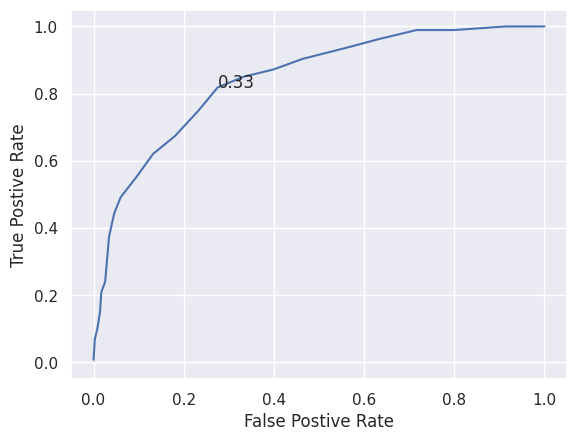

In [502]:
# Plot roc curve
ax = sns.lineplot(x=fpr, y=tpr)
ax.annotate('%s'% round(optimal_threshold, 2), xy=(fpr[ optimal_idx], tpr[optimal_idx]))
ax.set_xlabel("False Postive Rate")
ax.set_ylabel("True Postive Rate")
plt.show()

In [503]:
# Predictions with optimal threshold
y_pred = gs_cv.predict_proba(X_train)[:, 1]
y_pred = (y_pred >= thresholds[optimal_idx]).astype(int)

print(f"Training Accuracy: {round(accuracy_score(y_train, y_pred)*100, 2)}")
print(f"Training Precision: {round(precision_score(y_train, y_pred)*100, 2)}")
print(f"Training Recall: {round(recall_score(y_train, y_pred)*100, 2)}")
print("\n")

y_pred = gs_cv.predict_proba(X_test)[:, 1]
y_pred = (y_pred >= thresholds[optimal_idx]).astype(int)
print(f"Testing Accuracy: {round(accuracy_score(y_test, y_pred)*100, 2)}")
print(f"Testing Precision: {round(precision_score(y_test, y_pred)*100, 2)}")
print(f"Testing Recall: {round(recall_score(y_test, y_pred)*100, 2)}")

Training Accuracy: 75.75
Training Precision: 61.45
Training Recall: 81.82


Testing Accuracy: 74.89
Testing Precision: 61.62
Testing Recall: 75.31


Final conclusion after optimal threshold:

1. The training accurancy(75.75%) is consttant with testing accuracy(74.89) which shows model generalise very well and no sign of overfitting.
2. The model training recall (81.82%) shows that the model has identified 81 percent of true postive cases. However, there is a slight decline in the true postive rate for testing set.
3. The model training precison(61.45%) and testing precision(61.62) shows that the model is not capturing the false postive cases in case both training set and testing set